In [3]:
# no borrar esta celda
! rm *.c
! rm *.o
! rm *.so

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
%%file encontrar_pares.c
int encontrar_pares(int *a, int *x, int *y){
    int k_arr[] = {0, 1, 4, 9, 16, 25, 36, 49, 64, 81};
    int tope = sizeof(a)/sizeof(a[0]);
    int t = 0;
    for (int i = 0; i < tope; i++){
        for (int j = 0; j < tope; j++){
            if(i != j){
                int producto = a[i]*a[j];
                for(int k = 0; k < 11; k++){
                    if(producto == k_arr[k]){
                        x[t] = a[i];
                        y[t] = a[j];
                        t++;
                        break;
                    }    
                }
            }    
        }
    } 
    return t; 
}

Overwriting encontrar_pares.c


In [5]:
! gcc -c encontrar_pares.c -o encontrar_pares.o

In [6]:
! gcc -shared encontrar_pares.o -o encontrar_pares.so

In [7]:
import ctypes
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt
import ctypes
def ctypes_encontrar_pares():
    lib = ctypes.CDLL('./encontrar_pares.so')
    lib.encontrar_pares.argtypes = [np.ctypeslib.ndpointer(dtype=np.int32), np.ctypeslib.ndpointer(dtype=np.int32), np.ctypeslib.ndpointer(dtype=np.int32)]
    #Declaracion de punteros como tipos de variable de entrada, ademas al ser un modulo void, solo se necesitan variables de entrada porque los punteros van a cambiar sus valores.
    #int32 para arreglos en c con datos tipo int
    #Ctypes asume que todos los argumentos de entrada son enteros
    #float64 = double (tipos de variable para declarar con dtype)
    lib.encontrar_pares.restype = ctypes.c_int
    return lib.encontrar_pares

In [8]:
encontrar_pares_raw = ctypes_encontrar_pares()
inp = [9, 5, 4, 3, 1, 7, 2, 8]
inp_c_rdy = np.array(inp, dtype=np.int32) #Convertir el tipo de variable del arreglo en int32 para que pueda ser  usado por encontrar_pares_raw
#otra manera de hacerlo:
#inp_c_rdy = np.asarray(inp).astype(np.int32)
max_len = len(inp_c_rdy)*len(inp_c_rdy)
x = np.zeros(max_len,dtype = np.int32)
y = np.zeros(max_len,dtype = np.int32)

In [9]:
def c_encontrar_pares(inp_c_rdy, x, y):
    t = encontrar_pares_raw(inp_c_rdy, x, y)
    x_out = []
    y_out = []
    for i in range(t):
        x_out.append(x[i])
        y_out.append(y[i])
    return x_out, y_out 

In [10]:
x_res = []
y_res = []
x_res, y_res = c_encontrar_pares(inp_c_rdy, x, y)
print(x_res)
print(y_res)

[9, 5]
[5, 9]


In [11]:
def python_encontrar_pares(a, x, y):
    k_arr = [0, 1, 4, 9, 16, 25, 36, 49, 64, 81] 
    tope = len(a)
    t = 0
    for i in range(tope):
        for j in range(tope):
            if(i != j):
                producto = a[i]*a[j]
                for k in range(10):
                    if(producto == k_arr[k]):
                        x[t] = a[i]
                        y[t] = a[j]
                        t+=1
                        break
    x_out = []
    y_out = []
    for i in range(t):
        x_out.append(x[i])
        y_out.append(y[i])
    return x_out, y_out

In [12]:
x_py, y_py = python_encontrar_pares(inp_c_rdy,x,y)
print(x_py)
print(y_py)

[9, 9, 4, 4, 1, 1, 2, 8]
[4, 1, 9, 1, 9, 4, 8, 2]


In [13]:
err_x = np.linalg.norm(inp_c_rdy - x_py)/np.linalg.norm(inp_c_rdy)
err_y = np.linalg.norm(inp_c_rdy - y_py)/np.linalg.norm(inp_c_rdy)
print(err_x)
print(err_y)

0.4613582183320136
0.9292221560321537


In [22]:
N = 1024
iter = 50
time_c = []
time_py = []
#print(len(x_prueba))
for i in range(iter):
    inp_arr = np.random.randint(0,10,N)
    inp_arr_rdy = np.array(inp_arr, dtype = np.int32)
    l_max = len(inp_arr_rdy)*len(inp_arr_rdy)
    x_prueba = np.zeros(l_max, dtype = np.int32)
    y_prueba = np.zeros(l_max, dtype = np.int32)
    tic3 = time.perf_counter()
    c_encontrar_pares(inp_arr_rdy, x_prueba, y_prueba)
    tic2 = time.perf_counter()
    python_encontrar_pares(inp_arr_rdy, x_prueba, y_prueba)
    tic1 = time.perf_counter()
    time_c.append(1e6*(tic2-tic3))
    time_py.append(1e6*(tic1-tic2))
#print("Mediana en python:",statistics.median(time_py))
#print("Mediana en c:",statistics.median(time_c))
#Graficos

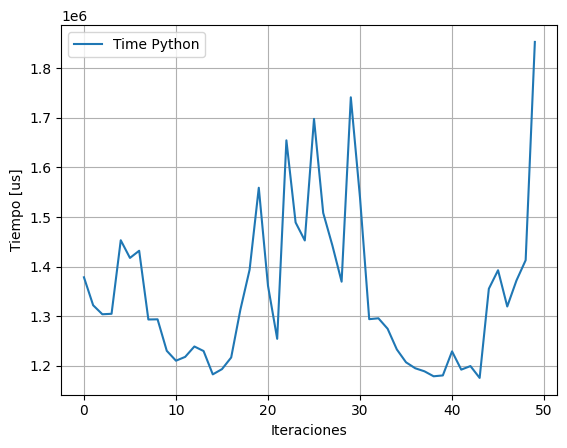

Tiempo medio de python_encontrar_pares: 1304336.549990694 us


In [26]:
plt.plot(time_py)
plt.grid()
plt.legend(["Time Python", "Time C"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.show()
plt.close()
print("Tiempo medio de python_encontrar_pares:",statistics.median(time_py), "us")


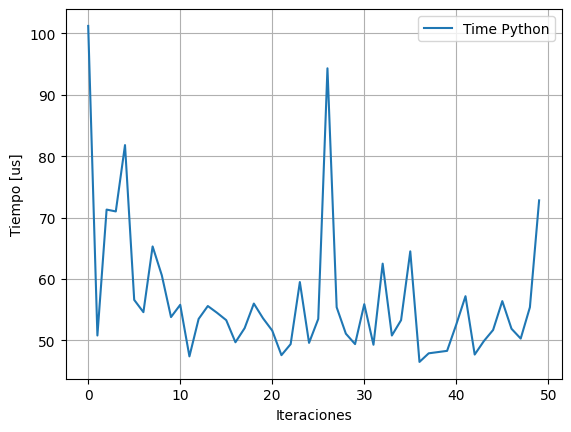

Tiempo medio de c_encontrar_pares: 53.499999921768904 us


In [25]:
plt.plot(time_c)
plt.grid()
plt.legend(["Time Python", "Time C"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.show()
plt.close()
print("Tiempo medio de c_encontrar_pares:",statistics.median(time_c), "us")

In [28]:
N = [32, 64, 128, 256, 512, 1024]
median_c_arr = []
median_py_arr = []
for n in N:
    time_c = []
    time_py = []
    #print(len(x_prueba))
    for i in range(iter):
        inp_arr = np.random.randint(0,10,n)
        inp_arr_rdy = np.array(inp_arr, dtype = np.int32)
        l_max = len(inp_arr_rdy)*len(inp_arr_rdy)
        x_prueba = np.zeros(l_max, dtype = np.int32)
        y_prueba = np.zeros(l_max, dtype = np.int32)
        tic3 = time.perf_counter()
        c_encontrar_pares(inp_arr_rdy, x_prueba, y_prueba)
        tic2 = time.perf_counter()
        python_encontrar_pares(inp_arr_rdy, x_prueba, y_prueba)
        tic1 = time.perf_counter()
        time_c.append(1e6*(tic2-tic3))
        time_py.append(1e6*(tic1-tic2))
    median_py_arr.append(statistics.median(time_py))
    median_c_arr.append(statistics.median(time_c))
print("Mediana python:", median_py_arr)
print("Mediana C:", median_c_arr)

Mediana python: [1622.6499865297228, 4878.699983237311, 20347.099998616613, 83745.30001310632, 314149.7999895364, 1243027.1500052186]
Mediana C: [40.700004319660366, 33.00001844763756, 39.9000127799809, 48.699992476031184, 52.89999535307288, 50.54999201092869]


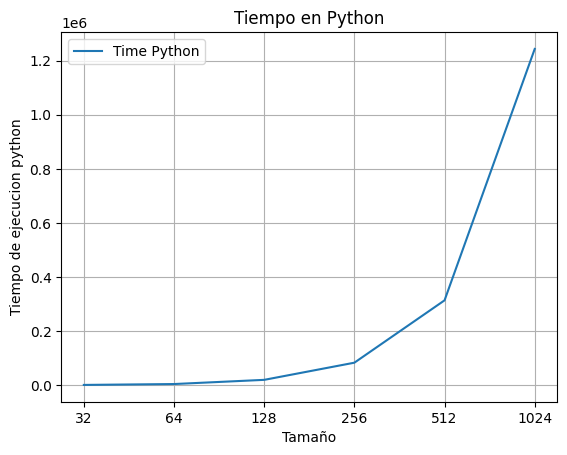

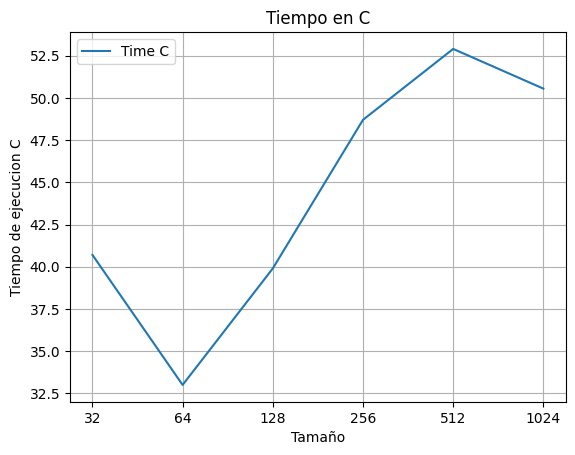

In [37]:
plt.plot(median_py_arr)
plt.grid()
plt.legend(["Time Python"])
plt.title("Tiempo en Python")
plt.xlabel("Tamaño")
plt.xticks(range(len(N)), N)
plt.ylabel("Tiempo de ejecucion python")
plt.show()
plt.close()

plt.plot(median_c_arr)
plt.grid()
plt.title("Tiempo en C")
plt.legend(["Time C"])
plt.xticks(range(len(N)), N)
plt.xlabel("Tamaño")
plt.ylabel("Tiempo de ejecucion C")
plt.show()
plt.close()


[39.86854580617066, 147.8393107864027, 509.952217579875, 1719.6162823705463, 5938.560067780571, 24590.05630973159]


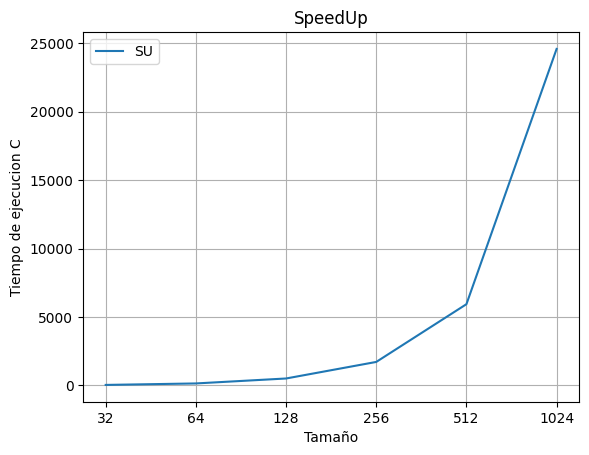

In [42]:
SU = []
for i in range(len(median_py_arr)):
    SU.append(median_py_arr[i]/median_c_arr[i])
print(SU)
plt.plot(SU)
plt.grid()
plt.title("SpeedUp")
plt.legend(["SU"])
#Poner los valores de N en lugar de 1,2,3...
plt.xticks(range(len(N)), N)
plt.xlabel("Tamaño")
plt.ylabel("Tiempo de ejecucion C")
plt.show()
plt.close()